# DATA-2000 Midterm Exam

## Recipe Rating Prediction

For this exercise, we are going to use a dataset of recipes and their ratings, taken from [the website Epicurious](https://www.epicurious.com/recipes-menus).

Our dataset contains basic information about the dish (its name, description, ingredients, and directions), as well as nutritional content (calories, protein, sodium, and fat contents). Based on this information, we want to try and predict how well or poorly the dish will be rated by users.


## Grading Rubric

This midterm will be worth 15% of your total grade for this course. It will be graded out of 50 points, divided into 4 sections:

  - Data Prep: 10 points
    - 5 points will be awarded for the actual data cleaning (evaluating your Python code)
    - 5 points will be awarded for the text commentary narrating your choices and explaining your rationale for the data quality checks that you chose to use
  - Feature Engineering: 12 points
    - 2 points will be awarded by default, but may be subtracted from if there are substantial errors in your data prep that reduce the quality of your engineered features
    - 5 points will be awarded for the actual feature engineering (evaluating your Python code)
    - 5 points will be awarded for the text commentary narrating your choices and explaining your rationale
  - Model Building: 14 points
    - 4 points will be awarded by default, but may be subtracted from if there are substantial errors in your feature engineering that reduce the quality of your model
    - 5 points will be awarded for the actual model building (evaluating your Python code)
    - 5 points will be awarded for the text commentary narrating your choices and explaining your rationale
  - Model Validation/Evaluation: 14 points
    - 4 points will be awarded by default, but may be subtracted from if there are substantial errors in your model building that negatively impact the validity of your model
    - 5 points will be awarded for the actual model validation and evaluation (evaluating your Python code)
    - 5 points will be awarded for the text commentary narrating your choices and explaining your rationale

> **NOTE:** You will NOT be evaluated on whether you model actually makes accurate predictions or not


## Using Additional Resources

This is an open-resource exam. You may use any available resources as references. I will be available for any questions that you have during the exam.

Remember that all work must still be your own, and that this exam is governed by the [Policy on Academic Honesty outlined in our course syllabus](https://docs.google.com/document/d/1Aoh7LvTKTEZO74eOsNhLzorkLtljkuchpg3ScNM_VEs/edit#heading=h.r0b18a8gh450).

-----

## Importing the Data

First, let's download our dataset and take a look at what it contains:

In [1]:
import pandas as pd

data = pd.read_json('https://cdn.c18l.org/full_format_recipes.json')

In [2]:
import numpy as np
import tensorflow as tf

In [3]:
pd.set_option('max_colwidth', None)


In [4]:
data.head()

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, thyme, and salt in a medium saucepan and bring to a boil. Reduce heat to low and simmer until the lentils are tender, about 30 minutes, depending on the lentils. (If they begin to dry out, add water as needed.) Remove and discard the thyme. Drain and transfer the mixture to a bowl; let cool., 2. Fold in the tomato, apple, lemon juice, and olive oil. Season with the pepper., 3. To assemble a wrap, place 1 lavash sheet on a clean work surface. Spread some of the lentil mixture on the end nearest you, leaving a 1-inch border. Top with several slices of turkey, then some of the lettuce. Roll up the lavash, slice crosswise, and serve. If using tortillas, spread the lentils in the center, top with the turkey and lettuce, and fold up the bottom, left side, and right side before rolling away from you.]",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegetable, Kid-Friendly, Apple, Lentil, Lettuce, Cookie]",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock, 1 cup dried brown lentils, 1/2 cup dried French green lentils, 2 stalks celery, chopped, 1 large carrot, peeled and chopped, 1 sprig fresh thyme, 1 teaspoon kosher salt, 1 medium tomato, cored, seeded, and diced, 1 small Fuji apple, cored and diced, 1 tablespoon freshly squeezed lemon juice, 2 teaspoons extra-virgin olive oil, Freshly ground black pepper to taste, 3 sheets whole-wheat lavash, cut in half crosswise, or 6 (12-inch) flour tortillas, 3/4 pound turkey breast, thinly sliced, 1/2 head Bibb lettuce]",559.0
1,"[Combine first 9 ingredients in heavy medium saucepan. Add 3 shallots. Bring to simmer. Remove from heat, cover and let stand 30 minutes. Chill overnight., Preheat oven to 325°F. Line 7-cup pâté or bread pan with plastic wrap. Melt butter in heavy small skillet over low heat. Add remaining 5 shallots. Cover and cook until very soft, stirring occasionally, about 15 minutes. Transfer to processor. Add pork, eggs, flour and Port and puree. Strain cream mixture, pressing on solids to extract as much liquid as possible. With processor running, add cream through feed tube and process just until combined with pork. Transfer to large bowl. Mix in currants., Spoon mixture into prepared pan. Cover with foil. Place pan in large pan. Add boiling water to larger pan to within 1/2 inch of top of terrine. Bake until terrine begins to shrink from sides of pan and knife inserted into center comes out clean, about 1 1/2 hours. Uncover and cool on rack. Chill until cold. (Can be made 3 days ahead. Cover and chill.), Line platter with lettuce. Arrange terrine atop. Sprinkle with pepper and parsley. Garnish with bay leaves. Spoon confit around sides. Serve with bread., Heat oil in heavy large skillet over medium-high heat. Add onions and sauté until crisp-tender, about 8 minutes. Add all remaining ingredients and stir until reduced to thick glaze, about 4 minutes. Season with salt and pepper. (Can be prepared 2 days ahead. Cover and chill.) Serve warm or at room temperature.]",23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille Day, New Year's Eve, Dried Fruit, Port, Winter, Chill, Bon Appétit]",403.0,"This uses the same ingredients found in boudin blanc, the classic French white sausage. Start two days before serving.",18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, chopped, 5 teaspoons salt, 3 bay leaves, 3 whole cloves, 1 large garlic clove, crushed, 1 teaspoon pepper, 1/8 teaspoon ground nutmeg, Pinch of dried thyme, crumbled, 8 large shallots, minced, 1 tablespoon butter, 1 pound trimmed boneless center pork loin, sinew removed cut into 1-inch chunks, well chilled, 3 eggs, 6 tablespoon all purpose flour, 1/4 cup tawny Port, 3 tablespoons dried currants, minced, Lettuce leaves, Cracked peppercorns, Minc

## Data Prep & Cleaning

Perform any data quality checks and data cleaning that you believe is appropriate. Convert any categorical columns to numeric ones, if needed. Provide a narrative explanation of your choices to accompany any code.

In [5]:
data.columns

Index(['directions', 'fat', 'date', 'categories', 'calories', 'desc',
       'protein', 'rating', 'title', 'ingredients', 'sodium'],
      dtype='object')

In [6]:
small_data = data.loc[:,[
    'fat', 'categories', 'calories',
    'rating', 'protein', 'sodium',
    'title', 'desc',
    # 'is_easy', 'is_Sandwich', 'is_gourmet',
    # 'is_Bon Appétit', 'is_Healthy'
]]

I decided to chose these columns to use in my model because I thought they would do the best job at giving me a prediction about people's food rating.

In [7]:

small_data = small_data.dropna()


I had to drop rows with a NaN value because my model kept giving me a loss and mean squared error of NaN.

In [8]:
small_data.describe()

,fat,calories,rating,protein,sodium
count,1.060800e+04,1.060800e+04,10608.000000,10608.000000,1.060800e+04
mean,4.006124e+02,7.403782e+03,3.804558,121.733503,7.275736e+03
std,2.380737e+04,4.188648e+05,1.263118,4553.387738,3.886472e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,9.000000e+00,2.060000e+02,3.750000,3.000000,1.000000e+02
50%,1.900000e+01,3.510000e+02,4.375000,9.000000,3.270000e+02
75%,3.500000e+01,6.120000e+02,4.375000,29.000000,7.652500e+02
max,1.722763e+06,3.011122e+07,5.000000,236489.000000,2.767511e+07


In [9]:
small_data= small_data.loc[small_data['calories'] <= 2000]
small_data = small_data.loc[small_data['calories']>= 200]
small_data = small_data.loc[small_data['sodium'] <= 650]
small_data = small_data.loc[small_data['protein']<= 100]
small_data = small_data.loc[small_data['fat']<= 75]
small_data.describe()


,fat,calories,rating,protein,sodium
count,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000
mean,23.145742,423.882247,3.848586,14.307877,248.993802
std,15.883353,205.574595,1.198139,15.760390,184.520616
min,0.000000,200.000000,0.000000,0.000000,0.000000
25%,13.000000,267.000000,3.750000,4.000000,89.000000
50%,20.000000,360.000000,4.375000,8.000000,220.000000
75%,31.000000,530.000000,4.375000,18.000000,391.000000
max,75.000000,1873.000000,5.000000,99.000000,650.000000


Here I decided to slim down my data to more realistic numbers based on some quick Google searches about how much fat, protein, or sodium oyu should be eating in a meal. I also set calories to be greater than or equal to 200 and less than or equal to 2000 because any less than 200 is barely a meal and any more than 2000 is an almost ridiculous meal in my opinion.

## Feature Engineering

Develop any new feature(s) that you feel may be relevant to a model. Provide a narrative explanation of your choices to accompany any code.

To help, I've included a `column_builder()` utility function that will create a new boolean column based on whether a string of text appears in any of (1) the recipe title; (2) the recipe description; or (3) the recipe tags.

In [10]:
def column_builder(category: str, dataset: pd.DataFrame) -> pd.DataFrame:
    dataset[f'is_{category}'] = ((
        dataset['categories'].apply(lambda x: category in x)
    ) | (
        dataset['title'].apply(lambda x: category in x)
    ) | (
        dataset['desc'].apply(lambda x: category in x)
    )).astype(int)

    return dataset


categories = [
    'easy',
    'breakfast',
    'Sandwich',
    'gourmet',
    'Healthy'
    # Add any additional keywords here
]

for category in categories:
    data = column_builder(category, small_data)

data['is_easy'].describe()

count    5002.000000
mean        0.032987
std         0.178620
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: is_easy, dtype: float64

Here I used your code to add some columns indicating if the meal was a sandwich because I am personally a big sandwich fan. I also created some columns that checked for buzz words gourmet, Bon Appétit, and healthy because I thought those would be helpful in my model.

In [11]:
small_data['protein_per_calorie'] = small_data['protein'] / small_data['calories']
small_data['fat_per_calorie'] = small_data['fat'] / small_data['calories']

# new_clean_data = new_clean_data[new_clean_data['car_age'] >= 0]
small_data.describe()

,fat,calories,rating,protein,sodium,is_easy,is_breakfast,is_Sandwich,is_gourmet,is_Healthy,protein_per_calorie,fat_per_calorie
count,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000
mean,23.145742,423.882247,3.848586,14.307877,248.993802,0.032987,0.015194,0.015194,0.001200,0.083167,0.031833,0.053395
std,15.883353,205.574595,1.198139,15.760390,184.520616,0.178620,0.122336,0.122336,0.034617,0.276162,0.028367,0.025248
min,0.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,267.000000,3.750000,4.000000,89.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012121,0.038462
50%,20.000000,360.000000,4.375000,8.000000,220.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021818,0.054545
75%,31.000000,530.000000,4.375000,18.000000,391.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043933,0.069667
max,75.000000,1873.000000,5.000000,99.000000,650.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.166102,0.114815


Additionall, I created columns with protein and fat per calorie because I thought those would add some good additional information to my model.

In [12]:
small_data.columns

Index(['fat', 'categories', 'calories', 'rating', 'protein', 'sodium', 'title',
       'desc', 'is_easy', 'is_breakfast', 'is_Sandwich', 'is_gourmet',
       'is_Healthy', 'protein_per_calorie', 'fat_per_calorie'],
      dtype='object')

In [13]:
clean_data = small_data.drop(['categories', 'desc', 'title', 'rating', 'is_breakfast'], axis = 1)

Here I get rid of columns that will not be used in my model.

## Model Building

Build a model (either a regression or a neural network) to predict a recipe's rating based on any relevant attributes that you defined in the prior steps.

You may choose to predict rating as a continuous value (0.0 to 5.0), or as a categorical (low/medium/high or similar).

Provide a narrative explanation of your choices to accompany any code.

In [14]:

from sklearn.model_selection import train_test_split




target = data.pop('rating')
X_train, X_test, y_train, y_test = train_test_split(
    clean_data,
    target,
    test_size=0.2,
    random_state=42)


Creating my training and testing datasets.

In [15]:
X_train.head()

,fat,calories,protein,sodium,is_easy,is_Sandwich,is_gourmet,is_Healthy,protein_per_calorie,fat_per_calorie
15450,31.0,486.0,33.0,98.0,0,0,0,0,0.067901,0.063786
3165,14.0,212.0,14.0,411.0,0,0,0,0,0.066038,0.066038
18697,1.0,264.0,9.0,2.0,0,0,0,0,0.034091,0.003788
16793,9.0,437.0,3.0,66.0,0,0,0,0,0.006865,0.020595
12091,19.0,520.0,27.0,280.0,0,0,0,0,0.051923,0.036538


In [16]:
X_train.describe()

,fat,calories,protein,sodium,is_easy,is_Sandwich,is_gourmet,is_Healthy,protein_per_calorie,fat_per_calorie
count,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000
mean,23.139465,424.518870,14.160960,249.134966,0.033492,0.015496,0.001500,0.082479,0.031683,0.053397
std,15.813477,205.385865,15.435368,184.364397,0.179939,0.123531,0.038701,0.275128,0.028190,0.025113
min,0.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,268.000000,4.000000,89.000000,0.000000,0.000000,0.000000,0.000000,0.012146,0.038462
50%,20.000000,362.000000,8.000000,219.000000,0.000000,0.000000,0.000000,0.000000,0.021552,0.054409
75%,30.000000,529.000000,18.000000,390.000000,0.000000,0.000000,0.000000,0.000000,0.043796,0.069652
max,75.000000,1873.000000,99.000000,650.000000,1.000000,1.000000,1.000000,1.000000,0.166102,0.114815


In [17]:
X_train.columns

Index(['fat', 'calories', 'protein', 'sodium', 'is_easy', 'is_Sandwich',
       'is_gourmet', 'is_Healthy', 'protein_per_calorie', 'fat_per_calorie'],
      dtype='object')

Here I define my training and testing datasets.

In [18]:
inputs = {
    'fat':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='fat'),
    'calories':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='calories'),
    'protein':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='protein'),
    'sodium':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='sodium'),
    'is_easy':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='is_easy'),
    'is_Sandwich':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='is_Sandwich'),
    'is_gourmet':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='is_gourmet'),
    'is_Healthy':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='is_Healthy'),
     'protein_per_calorie':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='protein_per_calorie'),
    'fat_per_calorie':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='fat_per_calorie'),
}

Here I create tensors for all of my x variables.

In [19]:
fat = tf.keras.layers.Normalization(
    name='normalization_fat',
    axis=None)
fat.adapt(X_train['fat'])
fat = fat(inputs.get('fat'))

calories = tf.keras.layers.Normalization(
    name='normalization_calories',
    axis=None)
calories.adapt(X_train['calories'])
calories = calories(inputs.get('calories'))

protein = tf.keras.layers.Normalization(
    name='normalization_protein',
    axis=None)
protein.adapt(X_train['protein'])
protein = protein(inputs.get('protein'))

sodium = tf.keras.layers.Normalization(
    name='normalization_sodium',
    axis=None)
sodium.adapt(X_train['sodium'])
sodium = sodium(inputs.get('sodium'))

is_easy = tf.keras.layers.Normalization(
    name='normalization_is_easy',
    axis=None)
is_easy.adapt(X_train['is_easy'])
is_easy = is_easy(inputs.get('is_easy'))

is_Sandwich = tf.keras.layers.Normalization(
    name='normalization_is_Sandwich',
    axis=None)
is_Sandwich.adapt(X_train['is_Sandwich'])
is_Sandwich = is_Sandwich(inputs.get('is_Sandwich'))

is_gourmet = tf.keras.layers.Normalization(
    name='normalization_is_gourmet',
    axis=None)
is_gourmet.adapt(X_train['is_gourmet'])
is_gourmet = is_gourmet(inputs.get('is_gourmet'))

is_Healthy = tf.keras.layers.Normalization(
    name='normalization_is_Healthy',
    axis=None)
is_Healthy.adapt(X_train['is_Healthy'])
is_Healthy = is_Healthy(inputs.get('is_Healthy'))

protein_per_calorie = tf.keras.layers.Normalization(
    name='normalization_protein_per_calorie',
    axis=None)
protein_per_calorie.adapt(X_train['protein_per_calorie'])
protein_per_calorie = protein_per_calorie(inputs.get('protein_per_calorie'))

fat_per_calorie = tf.keras.layers.Normalization(
    name='normalization_fat_per_calorie',
    axis=None)
fat_per_calorie.adapt(X_train['fat_per_calorie'])
fat_per_calorie = fat_per_calorie(inputs.get('fat_per_calorie'))

This is the normalization of my input layer.

In [20]:
preprocessing_layers = tf.keras.layers.Concatenate()(
    [inputs.get('fat'), inputs.get('calories'), inputs.get('protein'), inputs.get('sodium'),
     inputs.get('is_easy'), inputs.get('is_Sandwich'), inputs.get('is_gourmet'),
     inputs.get('is_Healthy'), inputs.get('protein_per_calorie'), inputs.get('fat_per_calorie')])

hidden1 = tf.keras.layers.Dense(
    units=32, activation='relu', name='hidden1')(preprocessing_layers)

hidden2 = tf.keras.layers.Dense(
  units=8, activation='relu', name='hidden2')(hidden1)

hidden3 = tf.keras.layers.Dense(
  units=4, activation='relu', name='hidden3')(hidden2)

dense_output = tf.keras.layers.Dense(
    units=1, activation='relu', name='dense_output')(hidden3)

outputs = {
'dense_output': dense_output
}

I then concatenate my tensors before sending them into the hidden layers. I then send them into the 3 hidden layers that this model will have. The first layer is 32 units wide, the second 8, and the thirs 4. They each have a ReLU activation funtion and they will terminate to a single output that also has a ReLU activation funtion.

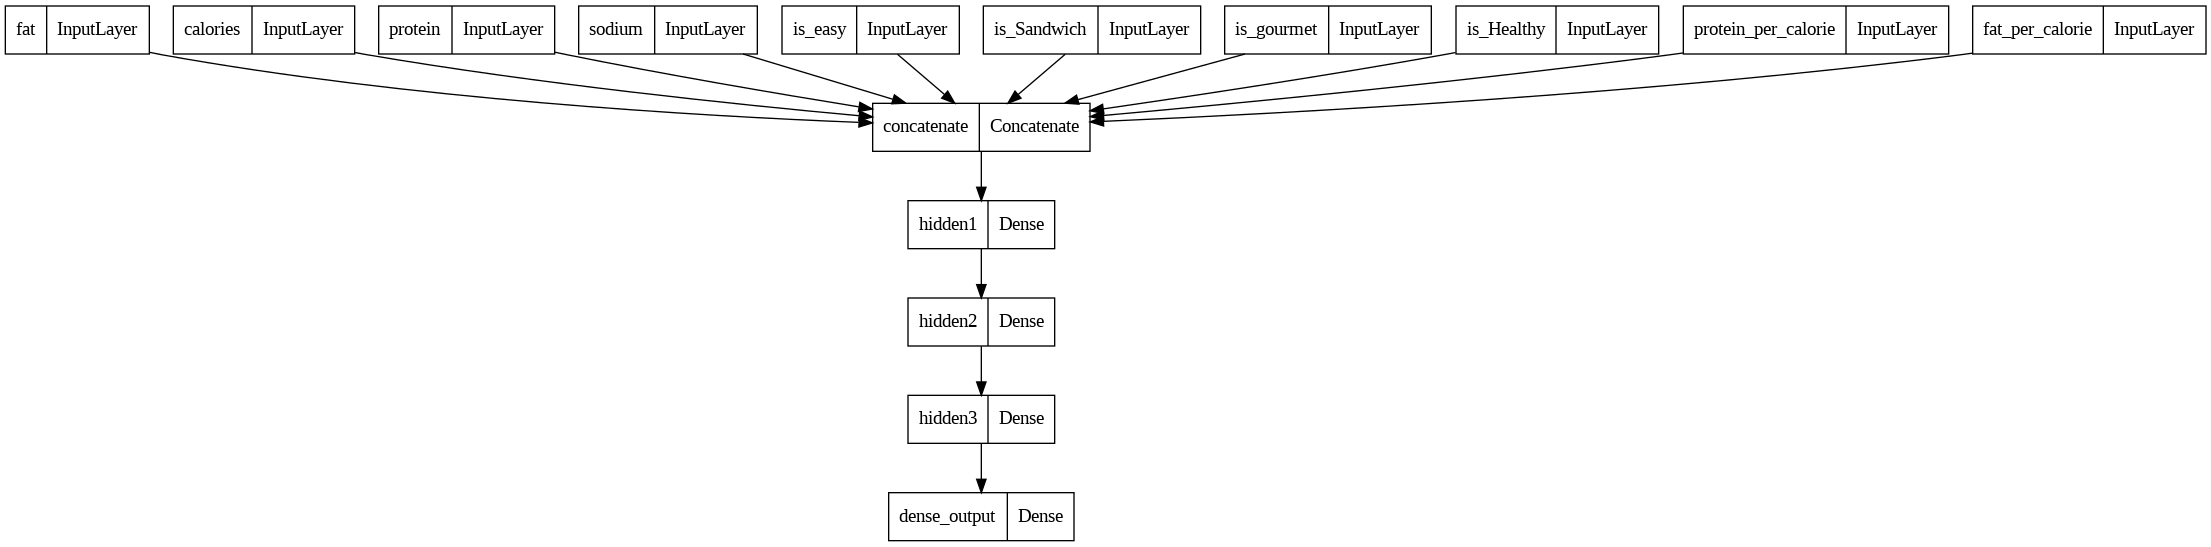

In [21]:
dnn_model = tf.keras.Model(inputs=inputs, outputs=dense_output)
dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss="mean_squared_error",
    metrics=[tf.keras.metrics.MeanSquaredError()]
)

tf.keras.utils.plot_model(dnn_model)


This is my compiled model that will be run in the next step.

## Model Evaluation

After training your model, evaluate its performance. What metric(s) did you choose to optimize on? Would you say that your model performed well or poorly? How did you evaluate its performance to arrive at that conclusion?

In [22]:
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

history = dnn_model.fit(
    {name:np.array(value) for name, value in X_train.items()},
    np.array(y_train.values),
    epochs=15,
    batch_size=1000,
    shuffle=True,
    validation_split=0.2
)

epochs = history.epoch
hist = pd.DataFrame(history.history)
mse = hist["mean_squared_error"]

Epoch 1/15
4/4 [==============================] - 1s 264ms/step - loss: 16.1688 - mean_squared_error: 16.1688 - val_loss: 16.6179 - val_mean_squared_error: 16.6179
Epoch 2/15
4/4 [==============================] - 1s 140ms/step - loss: 16.1688 - mean_squared_error: 16.1688 - val_loss: 16.6179 - val_mean_squared_error: 16.6179
Epoch 3/15
4/4 [==============================] - 0s 88ms/step - loss: 16.1688 - mean_squared_error: 16.1688 - val_loss: 16.6179 - val_mean_squared_error: 16.6179
Epoch 4/15
4/4 [==============================] - 0s 96ms/step - loss: 16.1688 - mean_squared_error: 16.1688 - val_loss: 16.6179 - val_mean_squared_error: 16.6179
Epoch 5/15
4/4 [==============================] - 0s 99ms/step - loss: 16.1688 - mean_squared_error: 16.1688 - val_loss: 16.6179 - val_mean_squared_error: 16.6179
Epoch 6/15
4/4 [==============================] - 0s 95ms/step - loss: 16.1688 - mean_squared_error: 16.1688 - val_loss: 16.6179 - val_mean_squared_error: 16.6179
Epoch 7/15
4/4 [====

I trained my model using an 80:20 validation split for 15 epochs and I chose to optimize on mean squared error.

In [23]:
from matplotlib import pyplot as plt


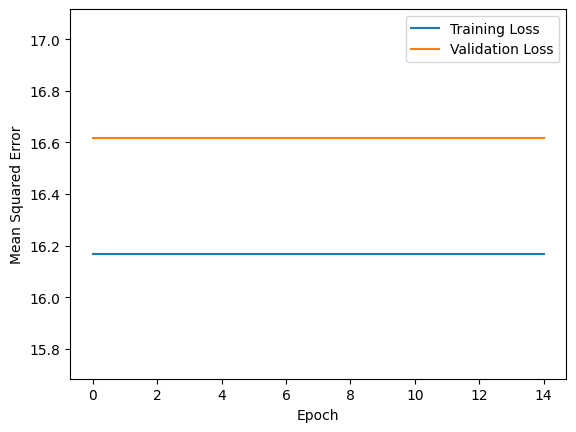

In [24]:
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")

plt.plot(epochs, mse, label="Training Loss")
plt.plot(epochs, history.history["val_mean_squared_error"], label="Validation Loss")

# mse_training is a pandas Series, so convert it to a list first.
merged_mse_lists = mse.tolist() + history.history["val_mean_squared_error"]
highest_loss = max(merged_mse_lists)
lowest_loss = min(merged_mse_lists)
top_of_y_axis = highest_loss * 1.03
bottom_of_y_axis = lowest_loss * 0.97

plt.ylim([bottom_of_y_axis, top_of_y_axis])
plt.legend()
plt.show()

In [25]:
print("\n Evaluate the new model against the test set:")
dnn_model.evaluate(
    x={name:np.array(value) for name, value in X_test.items()},
    y=np.array(y_test.values),
    batch_size=1000,
    return_dict=True)


 Evaluate the new model against the test set:
2/2 [==============================] - 0s 25ms/step - loss: 16.1994 - mean_squared_error: 16.1994


{'loss': 16.199424743652344, 'mean_squared_error': 16.199424743652344}

My model did not perform very well as the loss and mean squared error stayed the same throughout the entire training. After some Google searches i found out that it may be because my model is not learning at all. This may be due to overlearing in the training examples and then becoming useless in the new examples.

-----

# Midterm Submission

To submit this exam, in Canvas navigate to DATA-2000-51 > Assignments > Midterm Exam ([link](https://canvas.jcu.edu/courses/33514/assignments/407120)). You can either upload the `.ipynb` file directly to Canvas, or you can provide a link to the assignment on your GitHub.